In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
class polynomial:
    
    def __init__(self, coef):
        self.coef = coef
        self.degree = len(coef)-1
        
    def show(self):
        text = f"P(x)={self.coef[0]}"
        for i in range(1, self.degree+1):
            text = text + f"+{self.coef[i]}*x^{i}"
        print(text)
        return text
        
    def eval(self, x):
        return sum(self.coef[i]*x**i for i in range(self.degree+1))
    
    def plot(self, xlim, n = 1000, points = None):
        x = np.linspace(xlim[0], xlim[1], n)
        plt.plot(x, self.eval(x))
        if points:
            plt.scatter(points[0], points[1], c = "red")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.show()

In [3]:
def interpolation(x, y):
    n = len(x)
    coef = np.empty(n)
    A = np.array([[x[j]**i for i in range(n)] for j in range(n)])
    coef = np.linalg.solve(A, y)
    return polynomial(coef)

P(x)=2.0+-2.833366666666667*x^1+2.00005*x^2+-0.1666833333333333*x^3


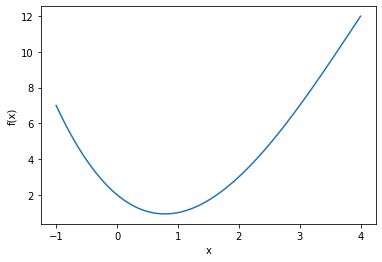

In [4]:
x = np.array([0, 1, 2, 3])
y = np.array([2, 1, 3, 6.9999])
result = interpolation(x, y)
result.show()
result.plot([-1, 4])

P(x)=1.0000000000000053+-4.443335855776198e-14*x^1+-16.855203619909986*x^2+1.1009711660866135e-12*x^3+123.35972850679272*x^4+-6.960922138522803e-12*x^5+-381.4338235294363*x^6+1.2793585635328905e-11*x^7+494.9095022624834*x^8+-6.889201304334954e-12*x^9+-220.94174208146825*x^10


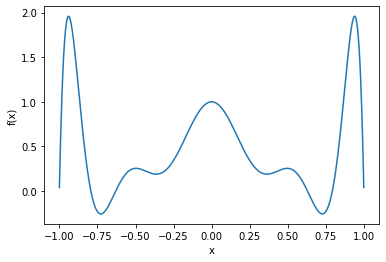

In [5]:
x = np.linspace(-1, 1, 11)
y = 1/(1+25*x**2)
result = interpolation(x, y)
result.show()
result.plot([-1, 1])
plt.show()

P(x)=0.3381106573193109+2.718993434688229*x^1+-0.5580533799948163*x^2+-18.539727775884014*x^3+3.7392027205159972*x^4+33.91529683799214*x^5+7.00532274189764*x^6+-22.96700710153181*x^7+-36.13939174536039*x^8+5.317513448891622*x^9+26.098339388239964*x^10
11


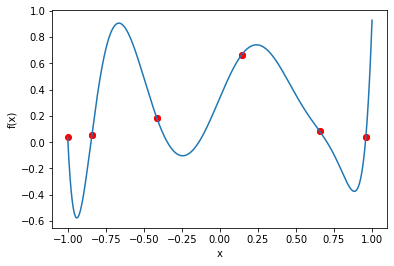

In [16]:
n = 11
x = np.array(np.sort([np.cos((2*i+1)/n*np.pi) for i in range(n)]))
y = 1/(1+25*x**2)
result = interpolation(x, y)
result.show()
points = x, y
print(len(points[0]))
result.plot([-1, 1], points = points)
plt.show()